In [113]:
# Import Libraries
import joblib
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPRegressor

plt.style.use({'figure.facecolor':'white'})

In [114]:
# Read CSV
df = pd.read_csv('C:/Users/mwaqa/Desktop/FYP-Soil-Analysis/Data/Kaggle Dataset of N, P, K, pH, Temperature and Labels.csv').drop(['Humidity', 'Label'], 1)
df.head()

,Nitrogen,Phosphorus,Pottassium,Temperature,pH,EC
0,14,67,25,25.287106,7.241152,0.000503
1,25,76,17,31.741054,7.241149,0.000505
2,0,74,17,23.333759,7.240988,0.000599
3,14,69,19,20.956285,7.239455,0.001514
4,108,36,19,22.782496,7.238567,0.002057


In [115]:
df.describe()

,Nitrogen,Phosphorus,Pottassium,Temperature,pH,EC
count,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000
mean,50.368860,53.403151,48.517609,25.614176,6.453441,4.530675
std,36.865582,33.208179,51.015478,5.077331,0.772755,17.364660
min,0.000000,5.000000,5.000000,8.825675,3.504752,0.000503
25%,21.000000,28.000000,20.000000,22.760150,5.956448,1.068576
50%,37.000000,51.000000,32.000000,25.605637,6.413738,1.873411
75%,84.000000,68.000000,49.000000,28.566535,6.886082,2.427262
max,140.000000,145.000000,205.000000,43.675493,9.935091,301.242946


In [116]:
# scaler = MinMaxScaler(feature_range=(0, 3))
# scaled_data = scaler.fit_transform(df.drop(['EC'], 1))
# df = pd.DataFrame({'Temperature': scaled_data[:, 0], 'pH': scaled_data[:, 1], 'Adjusted pH': scaled_data[:, 2], 'EC': df['EC']})

In [117]:
# df.describe()

In [118]:
# EC, pH, adjusted_pH = df[['EC']], df[['pH']], df[['Adjusted pH']]
#
# # Plot between pH and EC
# plt.scatter(pH, EC)
# plt.title('pH - EC')
# plt.xlabel('pH')
# plt.ylabel('EC')
# plt.show()
#
# # Plot between Adjusted pH and EC
# plt.scatter(adjusted_pH, EC)
# plt.title('Adjusted pH - EC')
# plt.xlabel('Adjusted pH')
# plt.ylabel('EC')
# plt.show()

In [119]:
# Extract Input Columns ( Adjusted pH, Temperature )
X_adjusted = df[['EC', 'Temperature']]
X_adjusted.head()

,EC,Temperature
0,0.000503,25.287106
1,0.000505,31.741054
2,0.000599,23.333759
3,0.001514,20.956285
4,0.002057,22.782496


In [120]:
# Extract Output Columns ( EC )
y_adjusted = df.drop(['EC', 'Temperature'], 1)
y_adjusted.head()

,Nitrogen,Phosphorus,Pottassium,pH
0,14,67,25,7.241152
1,25,76,17,7.241149
2,0,74,17,7.240988
3,14,69,19,7.239455
4,108,36,19,7.238567


In [121]:
# Extract Input Columns ( Original pH, Temperature )
# X_original = df[['pH', 'Temperature']]
# X_original.head()
#

In [122]:
# # Extract Output Columns ( EC )
# y_original = df[['EC']]
# y_original.head()

In [123]:
# Split Train & Test Data For Both Adjusted & Original Values
X_adjusted_train, X_adjusted_test, y_adjusted_train, y_adjusted_test = train_test_split(X_adjusted, y_adjusted, random_state=1)
# X_original_train, X_original_test, y_original_train, y_original_test = train_test_split(X_original, y_original, random_state=1)
# print(len(X_adjusted_train), len(y_adjusted_train))
# y_adjusted_train = y_adjusted_train.values.ravel()
# y_adjusted_test = y_adjusted_test.values.ravel()

# y_original_train = y_original_train.values.ravel()
# y_original_test = y_original_test.values.ravel()

In [124]:
print(len(X_adjusted_train), len(y_adjusted_train))
# Fit Two Models With Both Original & Adjusted Data
adjusted_data_model = MLPRegressor(random_state=1, max_iter=1000, activation='relu').fit(X_adjusted_train, y_adjusted_train)
# original_data_model = MLPRegressor(random_state=1, max_iter=1000, activation='relu', hidden_layer_sizes=(100, 50, 50)).fit(X_original_train, y_original_train)

1618 1618


In [125]:
# Generate Losses For Both Adjusted & Original Models
adjusted_data_model_loss = adjusted_data_model.loss_curve_
# original_data_model_loss = original_data_model.loss_curve_

adjusted_data_model_iteration = list(range(1, len(adjusted_data_model_loss) + 1))
# original_data_model_iteration = list(range(1, len(original_data_model_loss) + 1))

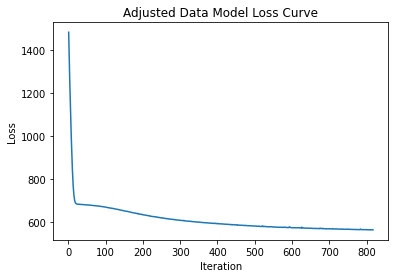

In [126]:
# Adjusted Data Model Loss Curve
plt.plot(adjusted_data_model_iteration, adjusted_data_model_loss)
plt.title('Adjusted Data Model Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Original Data Model Loss Curve
# plt.plot(original_data_model_iteration, original_data_model_loss)
# plt.title('Original Data Model Loss Curve')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.show()

In [127]:
# Checking The R2 Score Of Both Models
adjusted_data_model_score = adjusted_data_model.score(X_adjusted_test, y_adjusted_test)
# original_data_model_score = original_data_model.score(X_original_test, y_original_test)

print('Adjusted Data Model Score: ', adjusted_data_model_score)
# print('Original Data Model Score: ', original_data_model_score)

Adjusted Data Model Score:  0.10966224474482036


In [128]:
# Saving The Models
joblib.dump(adjusted_data_model, 'C:/Users/mwaqa/Desktop/FYP-Soil-Analysis/Models/NPK Model.h5')
# joblib.dump(original_data_model, 'C:/Users/mwaqa/Desktop/FYP-Soil-Analysis/Models/EC - pH Original Data Model.h5')


['C:/Users/mwaqa/Desktop/FYP-Soil-Analysis/Models/NPK Model.h5']